In [1]:
import networkx as nx
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [2]:
def tree_distance(A): # the sequence A = (a_n)_n is the input
    
    #Chose a branch according to the folloing probability (branch of lenght a_k)
    branch_proba = np.array([2^i*A[i] for i in range(len(A))])/sum([2^i*A[i] for i in range(len(A))])
    
    
    radius = np.array([i+1 for i in range(len(A))]) # these are the number of branches
    m = np.random.choice(radius, 1, replace=False, p=branch_proba)[0] #level of the first point
    n = np.random.choice(radius, 1, replace=False, p=branch_proba)[0] #level of the second point
    Max = max(m,n)
    Min = min(m,n)
    t_1 = random.choice([i for i in range(Max)]) # position of the first point in its branch
    t_2 = random.choice([i for i in range(Min)]) # position of the second point in its branch
    
    
    # find place where the radius to the two points get separated
    b = [] # sequence of Ber(1/2) of lengh min(m,n)
    for k in range(Min):
        if k==0:
            b.append(1)
        else:
            b.append(np.random.choice([0,1])) # proba that two radius coincide is always 1/2 at branch >1
    if [i for i in range(len(b)) if b[i]==0]  == []: # path stays the same until min(m,n)
        return(t_1 - t_2 + sum(A[i] for i in range(Max-1)) -  sum(A[i] for i in range(Min-1)) )
    
    else:
        i_0 = [i for i in range(len(b)) if b[i]==0][0]  
        return(t_1+t_2+ sum(A[i] for i in range(m-1)) + sum(A[i] for i in range(n-1)) -2*sum(A[i] for i in range(i_0-1)))
        
        
    
    
    
    

In [3]:
# test the function
A = [2^i for i in range(500)]
tree_distance(A)

196632

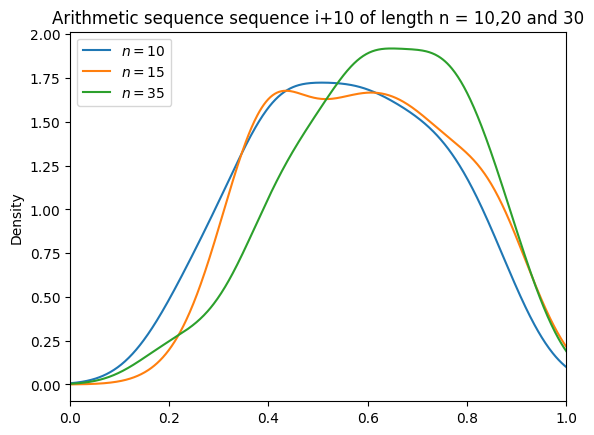

In [4]:
# Arithetic sequence
A_10=[i+10 for i in range(10)]
A_15=[i+10 for i in range(15)]
A_35=[i+10 for i in range(35)]

distance_10 = np.array([tree_distance(A_10) for i in range(100)])/(2*sum(A_10))
pd.Series(distance_10).plot.kde( label = r'$n= 10$')

distance_15 = np.array([tree_distance(A_15) for i in range(100)])/(2*sum(A_15))
pd.Series(distance_15).plot.kde( label = r'$n= 15$')

distance_35 = np.array([tree_distance(A_35) for i in range(100)])/(2*sum(A_35))
pd.Series(distance_35).plot.kde( label = r'$n= 35$')



plt.title('Arithmetic sequence sequence i+10 of length n = 10,20 and 30')
plt.legend()
plt.xlim(0,1)
plt.show()

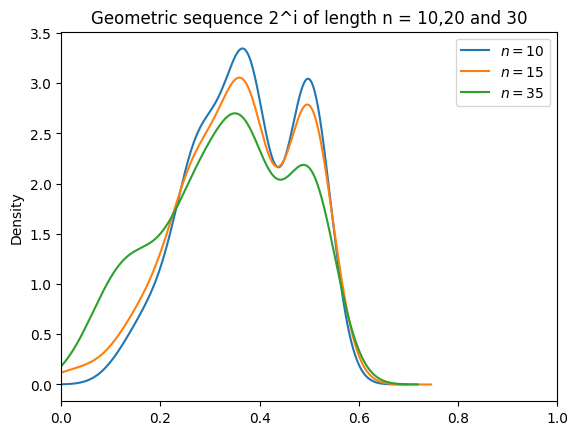

In [5]:
#Geometric sequence
A_10=[2**i for i in range(10)]
A_15=[2**i for i in range(15)]
A_35=[2**i for i in range(35)]

distance_10 = np.array([tree_distance(A_10) for i in range(100)])/(2*sum(A_10))
pd.Series(distance_10).plot.kde( label = r'$n= 10$')

distance_15 = np.array([tree_distance(A_15) for i in range(100)])/(2*sum(A_15))
pd.Series(distance_15).plot.kde( label = r'$n= 15$')

distance_35 = np.array([tree_distance(A_35) for i in range(100)])/(2*sum(A_35))
pd.Series(distance_35).plot.kde( label = r'$n= 35$')



plt.title('Geometric sequence 2^i of length n = 10,20 and 30')
plt.legend()
plt.xlim(0,1)
plt.show()

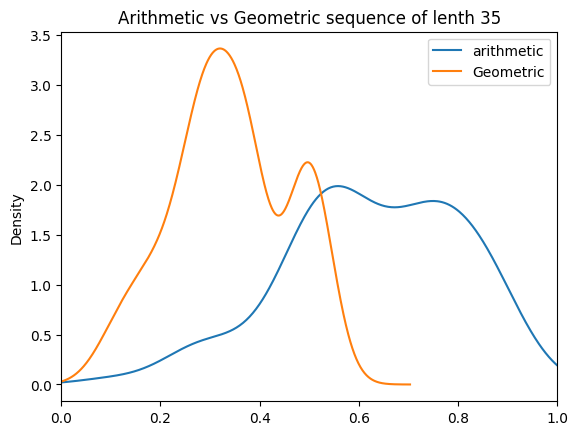

In [6]:
# arithmetic vs geometric
A_35_a=[i+10 for i in range(35)]
A_35=[2**i for i in range(35)]

distance_35_a = np.array([tree_distance(A_35_a) for i in range(100)])/(2*sum(A_35_a))
pd.Series(distance_35_a).plot.kde( label = "arithmetic")

distance_35 = np.array([tree_distance(A_35) for i in range(100)])/(2*sum(A_35))
pd.Series(distance_35).plot.kde( label = 'Geometric')


plt.title('Arithmetic vs Geometric sequence of lenth 35')
plt.legend()
plt.xlim(0,1)
plt.show()

# Dendron Simulation

## Simulation 1

In [7]:
def dendron_n(n):
    
    #define the function A 
    def A(n,x):
        return  max(x-n/2,n/2-x)
    
    #define the probability
    def Probability(n):
        path = np.array([i for i in range(n)])
        for i in range(n):
            if i <= np.sqrt(n):
                path[i] = (np.sqrt(n)- i)
            else:
                if i > np.sqrt(n) and i <= n-np.sqrt(n):
                    path[i] = 1
                else:
                    path[i] = (i-n+np.sqrt(n))
        return path/np.sum(path)
    
    #take the data
    P = Probability(n)
    x = np.random.choice(np.arange(0,n), p = P)
    y = np.random.choice(np.arange(0,n), p = P)
    return abs(x-y) + P[x]+ P[y]
    

In [8]:
dendron_n(6)

0.4

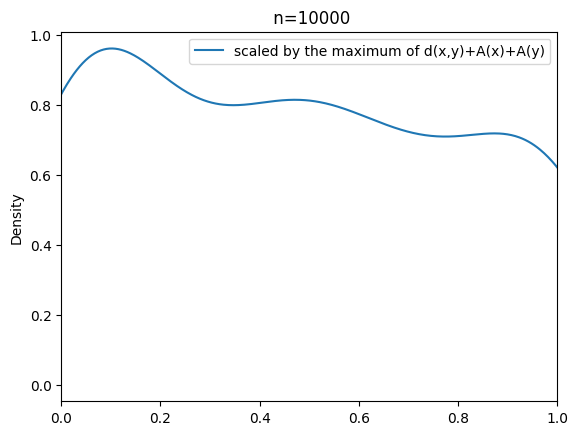

In [9]:
D_d100 = np.array([dendron_n(10000) for i in range(100)])

pd.Series(D_d100/max(D_d100)).plot.kde( label = "scaled by the maximum of d(x,y)+A(x)+A(y)")
plt.xlim(0,1)
#plt.ylim(0)
plt.legend()
plt.title(" n=10000")
plt.show()

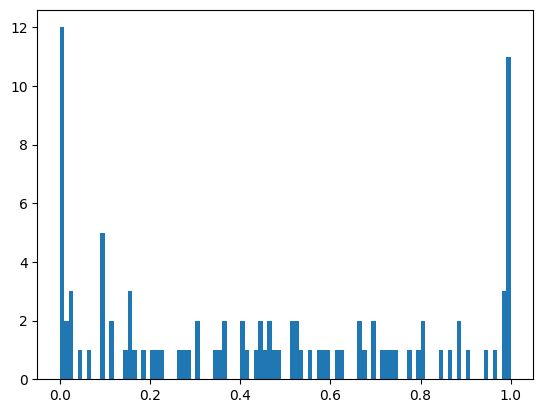

In [10]:
plt.hist(D_d100/max(D_d100), bins =100)
plt.show()

## Simulation 2: probability from thte list of $(i-n/2)^k$

In [11]:
def dendron_n(n):
    
    #define the function A 
    def A(n,x):
        return  max(x-n/2,n/2-x)
    
    #define the probability
    def Probability(n):
        path = np.array([i for i in range(n)])
        for i in range(n):
            path[i] = (i-n/2)**4
        return path/np.sum(path)
    
    #take the data
    P = Probability(n)
    x = np.random.choice(np.arange(0,n), p = P)
    y = np.random.choice(np.arange(0,n), p = P)
    return abs(x-y) + P[x]+ P[y]
    

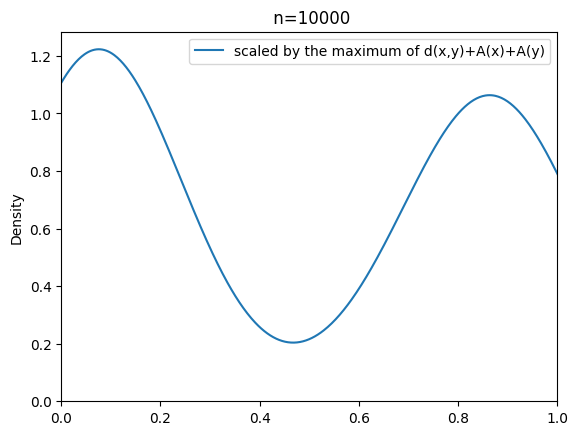

In [12]:
D_d100 = np.array([dendron_n(10000) for i in range(100)])

pd.Series(D_d100/max(D_d100)).plot.kde( label = "scaled by the maximum of d(x,y)+A(x)+A(y)")
plt.xlim(0,1)
plt.ylim(0)
plt.legend()
plt.title(" n=10000")
plt.show()

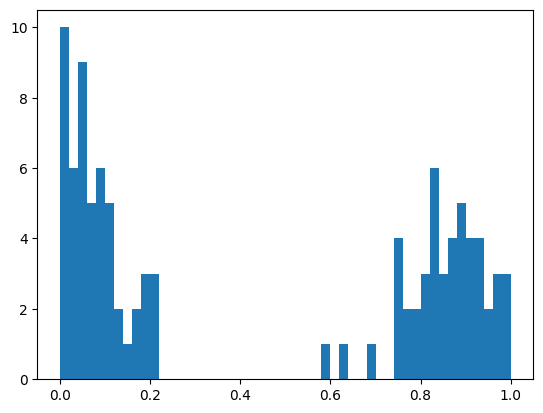

In [13]:
plt.hist(D_d100/max(D_d100), bins =50)
plt.show()

## Simulation 3: probability of the form: $(i/n-1/2)^k$

In [14]:
def dendron_n(n):
    
    #define the function A 
    def A(n,x):
        return  max(x-n/2,n/2-x)
    
    #define the probability
    def Probability(n):
        path = np.array([i for i in range(n)], dtype=np.float32)
        for i in range(n):
            path[i] = (i/n-1/2)**10
        return path/np.sum(path)
    
    #take the data
    P = Probability(n)
    x = np.random.choice(np.arange(0,n), p = P)
    y = np.random.choice(np.arange(0,n), p = P)
    return abs(x-y)+ P[x]+ P[y]
    

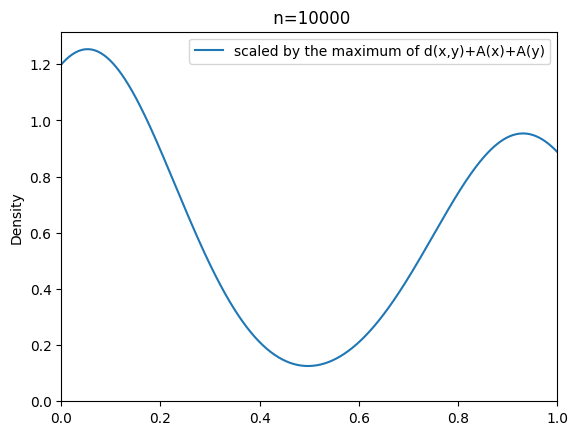

In [15]:
D_d100 = np.array([dendron_n(10000) for i in range(100)])

pd.Series(D_d100/max(D_d100)).plot.kde( label = "scaled by the maximum of d(x,y)+A(x)+A(y)")
plt.xlim(0,1)
plt.ylim(0)
plt.legend()
plt.title(" n=10000")
plt.show()

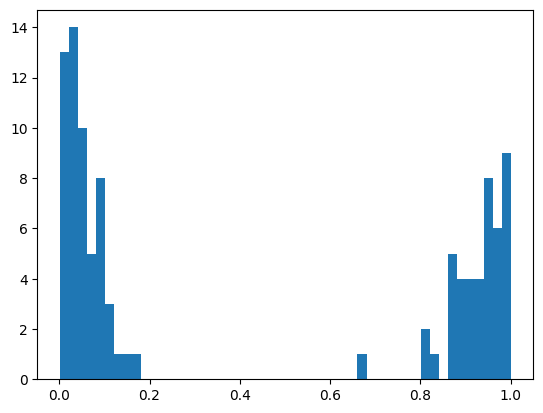

In [16]:
plt.hist(D_d100/max(D_d100), bins =50)
plt.show()

## Simulation 4 (new)

In [17]:
### t =1/4

In [18]:
def dendron_n(n):
    
    #define the function A 
    def A(n,x):
        return  (n/2-abs(n/2-x))/4
    
    #define the probability
    def Probability(n):
        path = np.array([i for i in range(n)], dtype=np.float32)
        for i in range(n):
            path[i] = n/np.sqrt((i+1)*(n+1-i))
        return path/np.sum(path)
    
    #take the data
    P = Probability(n)
    x = np.random.choice(np.arange(0,n), p = P)
    y = np.random.choice(np.arange(0,n), p = P)
    return abs(x-y)+ A(n,x)+ A(n,y)

In [19]:
D_d100 = np.array([dendron_n(1000) for i in range(10000)])

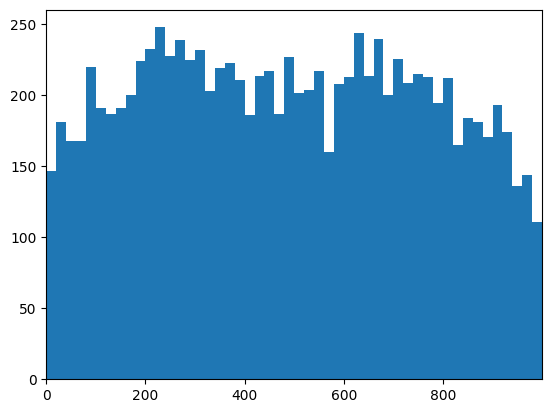

In [20]:
plt.hist(D_d100, bins =50)
plt.xlim(0,max(D_d100))
plt.show()

### t = ???, different A

In [21]:
def dendron_n(n):
    
    #define the function A 
    def A(n,x):
        return  x*(n-x)/(2*n)
    
    #define the probability
    def Probability(n):
        path = np.array([i for i in range(n)], dtype=np.float32)
        for i in range(n):
            path[i] = n/np.sqrt((i+1)*(n+1-i))
        return path/np.sum(path)
    
    #take the data
    P = Probability(n)
    x = np.random.choice(np.arange(0,n), p = P)
    y = np.random.choice(np.arange(0,n), p = P)
    return abs(x-y)+ A(n,x)+ A(n,y)

In [22]:
D_d100 = np.array([dendron_n(1000) for i in range(10000)])

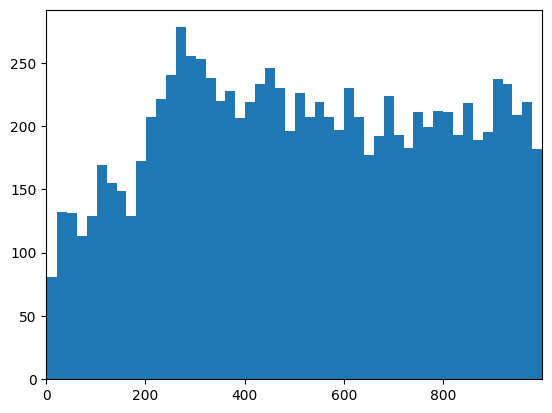

In [23]:
plt.hist(D_d100, bins =50)
plt.xlim(0,max(D_d100))
plt.show()

### Different A: min of two parabola

In [24]:
def dendron_n(n):
    
    #define the function A 
    def A(n,x):
        return  min(x**2, (n-x)**2)
    
    #define the probability
    def Probability(n):
        path = np.array([i for i in range(n)], dtype=np.float32)
        for i in range(n):
            path[i] = n/np.sqrt((i+1)*(n+1-i))
        return path/np.sum(path)
    
    #take the data
    P = Probability(n)
    x = np.random.choice(np.arange(0,n), p = P)
    y = np.random.choice(np.arange(0,n), p = P)
    return abs(x-y)+ A(n,x)+ A(n,y)

In [25]:
D_d100 = np.array([dendron_n(1000) for i in range(10000)])

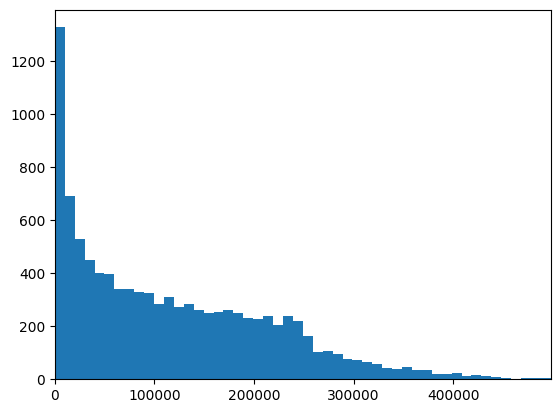

In [26]:
plt.hist(D_d100, bins =50)
plt.xlim(0,max(D_d100))
plt.show()

### next A

In [27]:
def dendron_n(n):
    
    #define the function A 
    def A(n,x):
        return  min((n/2-abs(n/2-x))/4, n/8)
    
    #define the probability
    def Probability(n):
        path = np.array([i for i in range(n)], dtype=np.float32)
        for i in range(n):
            path[i] = n/np.sqrt((i+1)*(n+1-i))
        return path/np.sum(path)
    
    #take the data
    P = Probability(n)
    x = np.random.choice(np.arange(0,n), p = P)
    y = np.random.choice(np.arange(0,n), p = P)
    return abs(x-y)+ A(n,x)+ A(n,y)

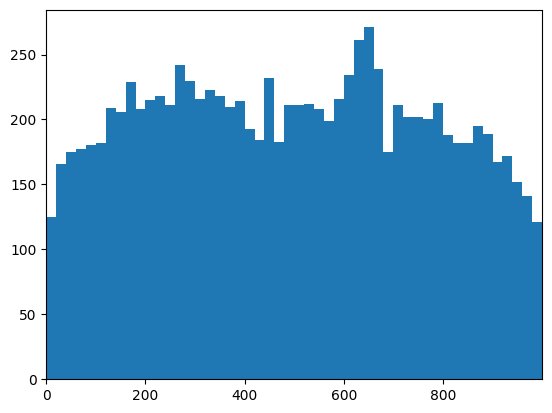

In [28]:
#Generate Data
D_d100 = np.array([dendron_n(1000) for i in range(10000)])

#plot histogram
plt.hist(D_d100, bins =50)
plt.xlim(0,max(D_d100))
plt.show()

### Different P

In [29]:
def dendron_n(n):
    
    #define the function A 
    def A(n,x):
        return  (n/2-abs(n/2-x))/4
    
    #define the probability
    def Probability(n):
        path = np.array([i for i in range(n)], dtype=np.float32)
        for i in range(n):
            path[i] = abs(n/np.sqrt((i+1)*(n+1-i)) - 1/2)
        return path/np.sum(path)
    
    #take the data
    P = Probability(n)
    x = np.random.choice(np.arange(0,n), p = P)
    y = np.random.choice(np.arange(0,n), p = P)
    return abs(x-y)+ A(n,x)+ A(n,y)

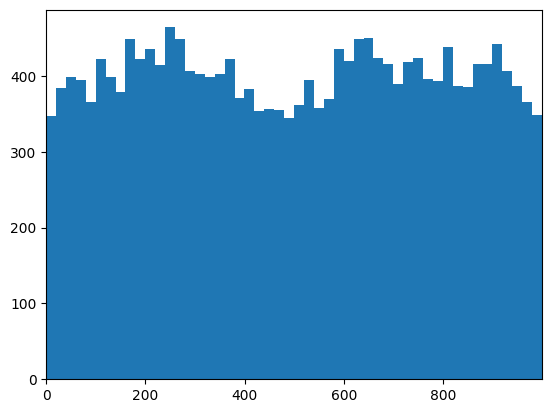

In [30]:
#Generate Data
D_d100 = np.array([dendron_n(1000) for i in range(20000)])

#plot histogram
plt.hist(D_d100, bins =50)
plt.xlim(0,max(D_d100))
plt.show()

In [31]:
#define function A on {0,1,2,...,n}
def A(i,n):
    return max(i-n/2,n/2-i) 

In [32]:
A(3,4)

1.0

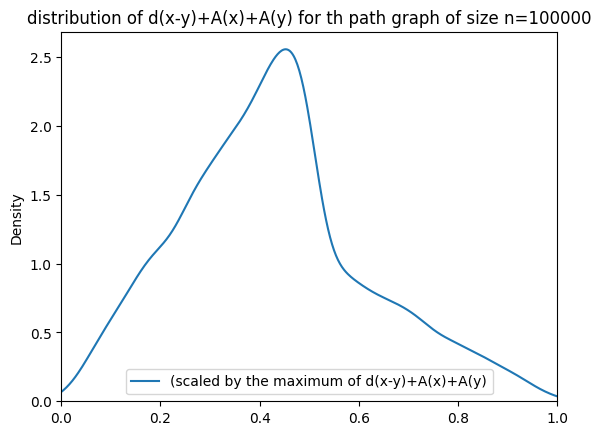

In [33]:
#fix n and simulate the distribution of (|x-y|+A(x)+A(y))/(2*n), where x,y are ind Univ{0,1,...,n}
#Uniform and any function

def dendron_n(n):
    x = np.random.randint(0,n)
    y = np.random.randint(0,n)
    z = np.random.randint(0,n)
    t = np.random.randint(0,n)
    return abs(x-y) + A(x,n)+A(y,n)



#n=100
D_d100 = np.array([dendron_n(100000) for i in range(10000)])

pd.Series(D_d100/max(D_d100)).plot.kde( label = "(scaled by the maximum of d(x-y)+A(x)+A(y)")
plt.xlim(0,1)
plt.ylim(0)
plt.legend()
plt.title("distribution of d(x-y)+A(x)+A(y) for th path graph of size n=100000")
plt.show()

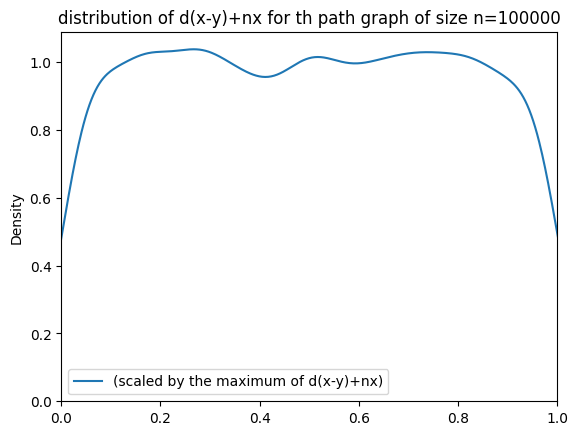

In [34]:
#fix n and simulate the distribution of (|x-y|+A(x)+A(y))/(2*n), where x,y are ind Univ{0,1,...,n}
#Uniform and any function

def dendron_n(n):
    x = np.random.randint(0,n)
    y = np.random.randint(0,n)
    z = np.random.randint(0,n)
    t = np.random.randint(0,n)
    return abs(x-y) + n*x



#n=100
D_d100 = np.array([dendron_n(100000) for i in range(10000)])

pd.Series(D_d100/max(D_d100)).plot.kde( label = "(scaled by the maximum of d(x-y)+nx)")
plt.xlim(0,1)
plt.ylim(0)
plt.legend()
plt.title("distribution of d(x-y)+nx for th path graph of size n=100000")
plt.show()

In [35]:
def A(x):
    return max(x-1/2,1/2-x)

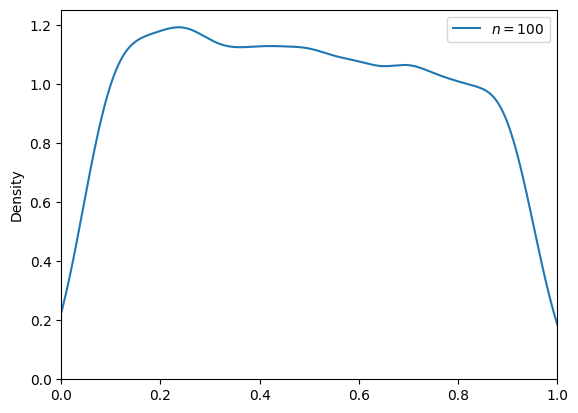

In [36]:
#fix n and simulate the distribution of (|x-y|+A(x)+A(y))/(2*n), where x,y are ind Univ{0,1,...,n}
#Uniform and any function

def dendron_n():
    x = np.random.uniform(0,1)
    y = np.random.uniform(0,1)
    u = np.random.uniform(-1,1)
    v = np.random.uniform(-1,1)
    return (abs(x-y)+10*x)/(1+10)
    #return -(x-y)**2 + 2*abs(x-y)



#n=100
D_d100 = np.array([dendron_n() for i in range(10000)])

pd.Series(D_d100).plot.kde( label = r'$n= 100$')
plt.xlim(0,1)
plt.ylim(0)
plt.legend()
plt.show()

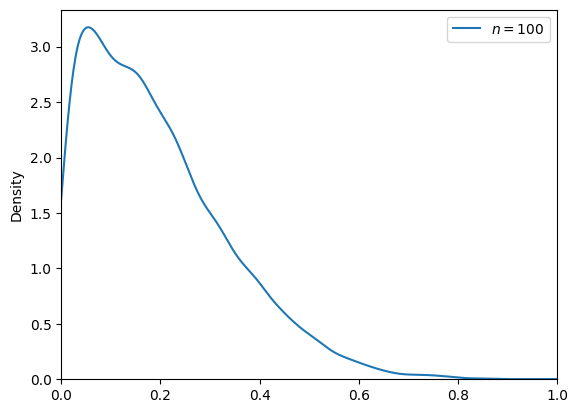

In [37]:
def magic(x):
    return -x**2+2*x

def dendron_n():
    x = np.random.normal(0,0.1)
    y = np.random.normal(0,0.1)
    u = np.random.uniform(-1,1)
    v = np.random.uniform(-1,1)
    return abs(x-y)



#n=100
D_d100 = np.array([dendron_n() for i in range(10000)])

pd.Series(D_d100/max(D_d100)).plot.kde( label = r'$n= 100$')
plt.xlim(0,1)
plt.ylim(0)
plt.legend()
plt.show()

In [38]:
dendron_n()

0.04327268541201713

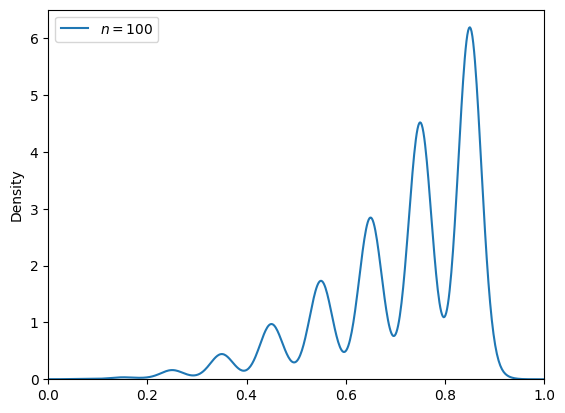

In [39]:
def A(x):
    return max(x-1/2,1/2-x)
#fix n and simulate the distribution of (|x-y|+A(x)+A(y))/(2*n), where x,y are ind Univ{0,1,...,n}
#Uniform and any function

def dendron_n(n):
    x = np.random.choice(np.arange(0,n), p= [A(i)/sum([A(i) for i in range(n)]) for i in range(n)])
    y = np.random.choice(np.arange(0,n), p= [A(i)/sum([A(i) for i in range(n)]) for i in range(n)])
    u = np.random.uniform(-1,1)
    v = np.random.uniform(-1,1)
    return (abs(x-y) + A(x)+ A(y))/(2*n)



#n=100
D_d100 = np.array([dendron_n(10) for i in range(10000)])

pd.Series(D_d100).plot.kde( label = r'$n= 100$')
plt.xlim(0,1)
plt.ylim(0)
plt.legend()
plt.show()

In [40]:
dendron_n(10)

0.55

In [41]:
#define function A on {0,1,2,...,n}
def A(i,n):
        return max(i-n/2,n/2-i) 
def dendron(n):
    L = np.array([i for i in range(n)])
    distro = np.array([1/2-A(i,n-1) for i in range(n)])
    proba = distro/sum(distro)
    x = np.random.choice(np.arange(0,n), p= proba)
    y = np.random.choice(np.arange(0,n), p= proba)
    return abs(x-y)+A(x,n)+A(y,n)

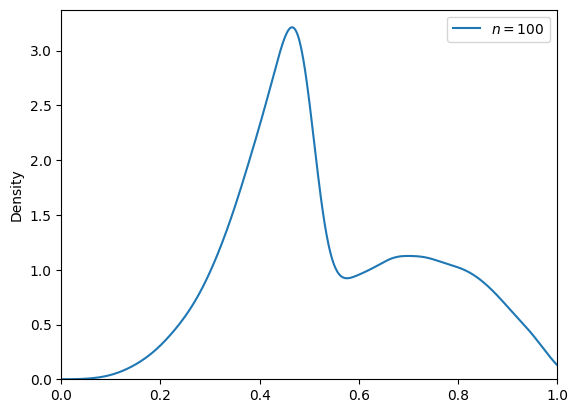

In [42]:
D_d100 = np.array([dendron(100) for i in range(10000)])

pd.Series(D_d100/max(D_d100)).plot.kde( label = r'$n= 100$')
plt.xlim(0,1)
plt.ylim(0)
plt.legend()
plt.show()